In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2024-10-01 18:15:20.233325: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 18:15:20.390940: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 18:15:20.473078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 18:15:20.707338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 18:15:20.772151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 18:15:21.006419: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Normalize pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Convert class vectors to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/home/rehan/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

2024-10-01 18:15:48.834090: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 1:46 68ms/step - accuracy: 0.0642 - loss: 2.3166

2024-10-01 18:15:58.820660: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-10-01 18:15:58.823636: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-10-01 18:15:58.839486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14191200 exceeds 10% of free system memory.
2024-10-01 18:15:58.877274: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 56ms/step - accuracy: 0.2856 - loss: 1.9088 - val_accuracy: 0.4869 - val_loss: 1.4492
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 81ms/step - accuracy: 0.4886 - loss: 1.4192 - val_accuracy: 0.5729 - val_loss: 1.2119
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5499 - loss: 1.2711 - val_accuracy: 0.6108 - val_loss: 1.0930
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.5873 - loss: 1.1840 - val_accuracy: 0.6349 - val_loss: 1.0473
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6201 - loss: 1.0927 - val_accuracy: 0.6505 - val_loss: 0.9919
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6434 - loss: 1.0291 - val_accuracy: 0.6767 - val_loss: 0.9251
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.6662 - loss: 0.9638 - val_accuracy: 0.6758 - val_loss: 0.9263
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.6787 - loss: 0.9

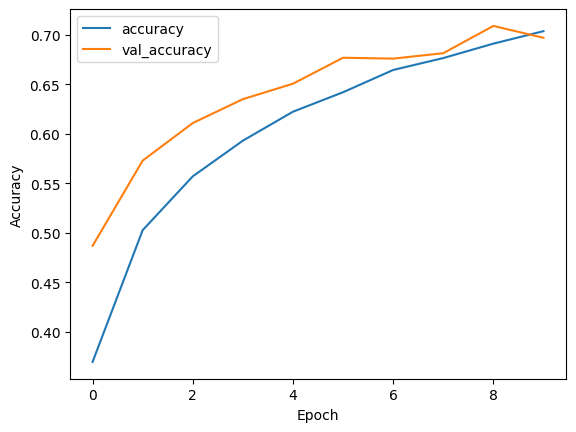

In [8]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
loss , acc = model.evaluate(X_test , y_test)

print(f'Test Accuracy : {acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7009 - loss: 0.8656
Test Accuracy : 69.68%
